### Event study in Stocks prices

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import causalpy as cp
import seaborn as sns
plt.style.use('seaborn')


WARNING (pytensor.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (pytensor.configdefaults): g++ not detected!  PyTensor will be unable to compile C-implementations and will default to Python. Performance may be severely degraded. To remove this warning, set PyTensor flags cxx to an empty string.
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
C:\Users\Jhona\AppData\Local\Temp/ipykernel_3328/1238468609.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [2]:
df = pd.read_excel('Stocks_prices.xlsx', parse_dates=True, index_col=0)

In [3]:
df.dropna(inplace=True)
df = df.pct_change().dropna()
df.sort_index(inplace=True)

In [4]:
df.head()

,SHOW3,MEEG,CINE1,AZUL
Pricing Date,,,,
2019-02-22,-0.003896,-0.142654,0.001870,-0.000817
2019-02-25,0.007853,0.024453,-0.013576,-0.007353
2019-02-26,0.032432,0.000261,0.007420,0.006966
2019-02-27,0.020690,0.011334,-0.006310,0.076248
2019-02-28,-0.006849,0.001154,-0.001832,0.016002


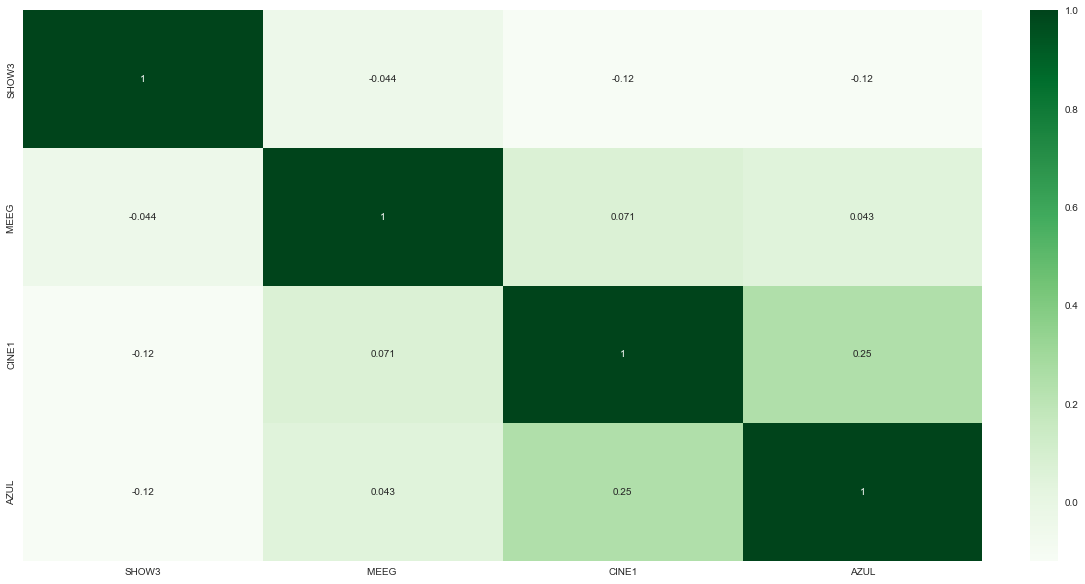

In [5]:
plt.figure(figsize=(15, 8))
grap = sns.heatmap(df.corr(), cmap='Greens', annot=True)

In [6]:
df = df.loc['2021-09-06':]

In [7]:
event = pd.to_datetime('2022-09-06')

In [8]:
model = cp.pymc_models.WeightedSumFitter()

In [9]:
formula = 'SHOW3 ~ 0 + CINE1 + AZUL'

In [10]:
results = cp.pymc_experiments.SyntheticControl(
    df,
    event,
    formula=formula,
    model=model,
)

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 212 seconds.
Sampling: [beta, sigma, y_hat]
Sampling: [y_hat]
Sampling: [y_hat]
Sampling: [y_hat]
Sampling: [y_hat]


(<Figure size 504x576 with 3 Axes>,
 array([<Axes: title={'center': '\n            Pre-intervention Bayesian $R^2$: 0.349\n            (std = 0.019)\n            '}>,
        <Axes: title={'center': 'Causal Impact'}>,
        <Axes: title={'center': 'Cumulative Causal Impact'}>], dtype=object))

<Figure size 576x1080 with 0 Axes>

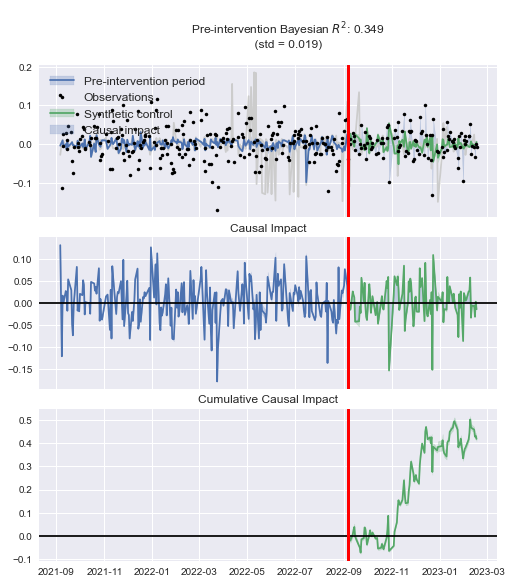

In [11]:
plt.figure(figsize=(8, 15))
results.plot(plot_predictors=True)